# Plotting observational data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.interpolate import interp1d

In [3]:
# observational data, select lat & lon
LAT = 40
LON = -130
ds_mld = xr.open_dataset('MLD_Argo_3x3_climatology.nc')
ds_sw  = xr.open_dataset('SWrad_NCEP2_3x3_climatology.nc')
ds_npp = xr.open_dataset('NPP_VGPM_3x3_climatology.nc')

In [4]:
# Let us focus on the seasonal cycle at a fix point 
# MLD
hml0 = ds_mld.mld_da_median.sel(lat=LAT,method='nearest').sel(lon=LON,method='nearest').to_numpy()
# Light
I0 = ds_sw.dswrf.sel(lat=LAT,method='nearest').sel(lon=LON,method='nearest').to_numpy()
# Temperature
T0 = ds_mld.mlt_da.sel(lat=LAT,method='nearest').sel(lon=LON,method='nearest').to_numpy()
# NPP
npp0 = ds_npp.NPP.sel(lat=LAT,method='nearest').sel(lon=LON,method='nearest').to_numpy()

Text(0.5, 0, 'days from 01-01')

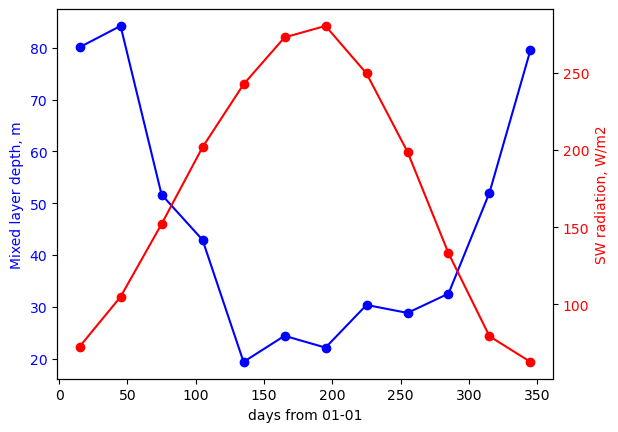

In [5]:
# Can we display 2 variables together?
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#
t=np.arange(15,360,30)
ax1.plot(t,hml0,'bo-')
ax1.set_ylabel('Mixed layer depth, m', color='b')
ax1.tick_params(axis='y',labelcolor='b')
#
ax2.plot(t,I0,'ro-')
ax2.set_ylabel('SW radiation, W/m2', color='r')
ax2.tick_params(axis='y',labelcolor='r')
#
ax1.set_xlabel('days from 01-01')

Text(0.5, 0, 'days from 01-01')

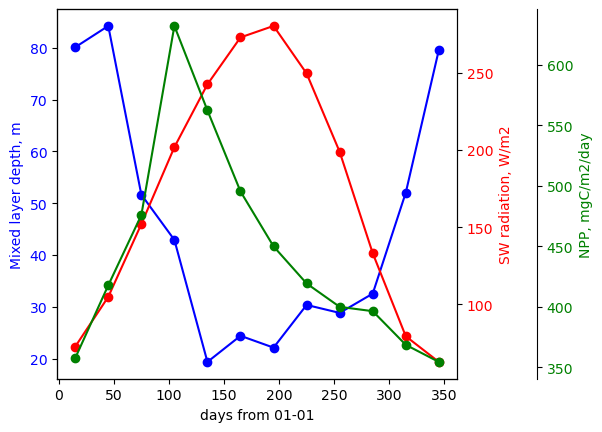

In [6]:
# Can we display 3 variables together?
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=0.75)
#
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
#
t=np.arange(15,360,30)
ax1.plot(t,hml0,'bo-')
ax1.set_ylabel('Mixed layer depth, m', color='b')
ax1.tick_params(axis='y',labelcolor='b')
#
ax2.plot(t,I0,'ro-')
ax2.set_ylabel('SW radiation, W/m2', color='r')
ax2.tick_params(axis='y',labelcolor='r')
#
ax3.plot(t,npp0,'go-')
ax3.set_ylabel('NPP, mgC/m2/day', color='g')
ax3.tick_params(axis='y',labelcolor='g')
#
ax1.set_xlabel('days from 01-01')